In [72]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import re
import xml.etree.ElementTree as ET
import xmltodict
import collections
import itertools
from scipy import stats
import statsmodels.api as sm 

import matplotlib.pyplot as plt
from ratelimit import limits, sleep_and_retry
# Import API key


In [2]:
StateSelected = ['GA']

In [3]:
zipcodes=pd.read_csv('free-zipcode-database-Primary.csv')
zipcodes.head()

,Zipcode,State
0,705,PR
1,610,PR
2,611,PR
3,612,PR
4,601,PR


In [4]:
gazipcodes= zipcodes[zipcodes.State.isin(StateSelected)]

In [5]:
gazipcodes=gazipcodes.head(10)
len(gazipcodes)

10

## Perform API Calls

In [6]:

#conn = http.client.HTTPSConnection("search.onboard-apis.com") 

params = { 
    'accept': "application/json", 
    'apikey': "9d078487e223b1c4d54c3f3a3f628803", 
} 

In [7]:
FullAddress=[]
Street=[]
CityStateZip=[]
Latitude=[]
Longitude=[]
pd.Series(FullAddress)
pd.Series(Latitude)
pd.Series(Longitude)
Data_set=pd.DataFrame({'FullAddress':pd.Series(FullAddress),'Street':pd.Series(Street),'CityStateZip':pd.Series(CityStateZip),'Latitude':pd.Series(Latitude),'Longitude':pd.Series(Longitude)})
url=f"https://search.onboard-apis.com/propertyapi/v1.0.0/property/address?postalcode=postalcode&page=1&pagesize=100"
for index, row in gazipcodes.iterrows():
    postalcode=row['Zipcode']
    url=f"https://search.onboard-apis.com/propertyapi/v1.0.0/property/address?postalcode={postalcode}&page=1&pagesize=1000"
    res = requests.get(url,headers=params)
    data =json.loads(res.text)
    we=data
    try:
        d=pd.DataFrame(data['property'])
        d['FullAddress']=d['address'].apply(lambda a:a['oneLine'])
        d['Street']=d['address'].apply(lambda d:d['line1'])
        d['CityStateZip']=d['address'].apply(lambda d:d['line2'])
        d['Latitude']=d['location'].apply(lambda c:c['latitude'])
        d['Longitude']=d['location'].apply(lambda b:b['longitude'])
        datatoappend=d[['FullAddress','Street','CityStateZip','Latitude','Longitude']]
        Data_set=Data_set.append(datatoappend)
        
    
            
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
    


In [8]:
Data_set.head()

,FullAddress,Street,CityStateZip,Latitude,Longitude
0,"109 TAYLOR BRIDGE RD SW, CALHOUN, GA 30701",109 TAYLOR BRIDGE RD SW,"CALHOUN, GA 30701",34.417930,-84.937120
1,"137 TAYLOR BRIDGE RD SW # A, CALHOUN, GA 30701",137 TAYLOR BRIDGE RD SW # A,"CALHOUN, GA 30701",34.418477,-84.937531
2,"137 TAYLOR BRIDGE RD SW, CALHOUN, GA 30701",137 TAYLOR BRIDGE RD SW,"CALHOUN, GA 30701",34.418477,-84.937531
3,"314 ROBBINS CREEK TRL SW, CALHOUN, GA 30701",314 ROBBINS CREEK TRL SW,"CALHOUN, GA 30701",34.420551,-84.983000
4,"310 ROBBINS CREEK TRL SW, CALHOUN, GA 30701",310 ROBBINS CREEK TRL SW,"CALHOUN, GA 30701",34.420560,-84.983002


In [9]:
Data_set['Zilliw format add']=Data_set['Street'].replace(" ", "+",regex=True)
Data_set['Zilliw format Zipciy']=Data_set['CityStateZip'].replace(" ", "+",regex=True)


In [11]:
# Data_set['Zestimate']=" "
# Data_set['LastSoldPrice']=" "
# Data_set['Year Built']=" "
# Data_set['totalRooms']=" "
# Data_set['finishedSqFt']=" "
# Data_set['useCode']=" "
# Data_set['zpid']=" "
DataSet=Data_set.head(100)


In [19]:
#Next is to feed the addresess to zillow api
# OpenWeatherMap API Key
zid = 'X1-ZWz1go72alddzf_8469v'
#api_key = api_keys.api_key

# Starting URL for Weather Map API Call
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

#url = f"http://www.zillow.com/webservice/GetDeepSearchResults.htm?zws-id={api_key}&address=109 TAYLOR BRIDGE RD SW&citystatezip=CALHOUN GA 30701"  
#url = f"http://www.zillow.com/webservice/GetDeepSearchResults.htm?zws-id={api_key}&address=5888+Colonnade+Drive&citystatezip=Rex,+GA+30273"  


In [30]:
# response =requests.get(url)

# w=response.content
dic



OrderedDict([('result',
              OrderedDict([('zpid', '114274379'),
                           ('links',
                            OrderedDict([('homedetails',
                                          'https://www.zillow.com/homedetails/103-Carpenter-Rd-NE-Calhoun-GA-30701/114274379_zpid/'),
                                         ('graphsanddata',
                                          'http://www.zillow.com/homedetails/103-Carpenter-Rd-NE-Calhoun-GA-30701/114274379_zpid/#charts-and-data'),
                                         ('mapthishome',
                                          'http://www.zillow.com/homes/114274379_zpid/'),
                                         ('comparables',
                                          'http://www.zillow.com/homes/comps/114274379_zpid/')])),
                           ('address',
                            OrderedDict([('street', '103 Carpenter Rd NE'),
                                         ('zipcode', '30701'),
         

In [75]:
zpid=[]
zest=[]
addr =[]
city=[]
zipC=[]
type=[]
rooms=[]
sqft=[]
state=[]
lastsoldprice=[]
lastsolddate=[]
year_built=[]
c_value=[]
county=[]
lat =[]
lon =[]
Zindex =[]

for index, row in Data_set.iterrows():
    add=row['Zilliw format add']
    statezip=row['Zilliw format Zipciy']
    params2=f'{add}&citystatezip={statezip}'
    url2 = f"http://www.zillow.com/webservice/GetDeepSearchResults.htm?zws-id={zid}&address={params2}"

   
    response2 = requests.get(url2, params=params2)
 
    we=response2.content
   
    tree=ET.fromstring(we)
    results=tree.findall('./response/results/result')
    
    if len(results)!=0:
        re=results[0] 
        dic=xmltodict.parse(ET.tostring(re))
        try: 
            
             Zid=dic['result'].get('zpid',np.nan)
             zestimate=dic['result']['zestimate']['amount'].get('#text',np.nan)
             strt=dic['result']['address'].get('street',np.nan)
             zip=dic['result']['address'].get('zipcode',np.nan)
             cit=dic['result']['address'].get('city',np.nan)
             price=dic['result'].get('lastSoldPrice',np.nan)
             solddate=dic['result'].get('lastSoldDate',np.nan)
             room=dic['result'].get('bedrooms',np.nan)
             usecode=dic['result'].get('useCode',np.nan)
             sqftt=dic['result'].get('finishedSqFt',np.nan)
             yearbuilt=dic['result'].get('yearBuilt',np.nan)
             contyvalue=dic['result'].get('taxAssessment',np.nan)
             Zindx =dic['result'].get('localRealEstate',np.nan)
             year_built.append(yearbuilt)
             lati=dic['result']['address'].get('latitude',np.nan)
             longi=dic['result']['address'].get('longitude',np.nan)
             lon.append(longi)
             lat.append(lati)
             zest.append(zestimate)
             zpid.append(Zid)
             addr.append(strt)
             zipC.append(zip)
             city.append(cit)
             lastsoldprice.append(price)
             rooms.append(room)
             type.append(usecode)
             sqft.append(sqftt)
             c_value.append(contyvalue)
             lastsolddate.append(solddate)
             Zindex.append(Zindx)
             longi=[]
             lati=[]
             Zindx=[]
             solddate=[]
             zestimate=[]
             Zid=[]
             price=[]
             room=[]
             usecode=[]
             sqftt=[]
             cit=[]
             usecode=[]
             yearbuilt=[]
             contyvalue=[]
             strt=[]
             print(f'got it updating')
             
        except (KeyError, IndexError):
             print(skip)
        


got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it updating
got it u

KeyboardInterrupt: 

In [76]:
re

<Element 'result' at 0x000000000C2395E8>

In [77]:
d=pd.DataFrame({'Zillow Id':pd.Series(zpid),'Zestimate':pd.Series(zest),'Street':pd.Series(addr),\
                'City':pd.Series(city),'ZipCode':pd.Series(zipC),'lastSold':pd.Series(lastsoldprice),\
                'Bedrooms':pd.Series(rooms),'typeofhome':pd.Series(type),'Squareft':pd.Series(sqft),\
              'YearBuilt':pd.Series(year_built),'CountTax':pd.Series(c_value),\
              'Latitude':pd.Series(lat),'Longitude':pd.Series(lon),'LastSoldDate':pd.Series(lastsolddate),\
                'Z_index':pd.Series(Zindex)})
              

In [78]:
df=d.drop_duplicates(['Zillow Id'])
df.head()

,Zillow Id,Zestimate,Street,City,ZipCode,lastSold,Bedrooms,typeofhome,Squareft,YearBuilt,CountTax,Latitude,Longitude,LastSoldDate,Z_index
0,111797219,443545,137 Taylor Bridge Rd SW # A,Calhoun,30701,NaN,3,SingleFamily,2998,2000,459600.0,34.41656,-84.940632,NaN,"{'region': {'@id': '23912', '@name': 'Calhoun'..."
1,111796580,586391,314 Robbins Creek Trl SW,CALHOUN,30701,NaN,4,SingleFamily,4609,2000,579500.0,34.417578,-84.982335,NaN,"{'region': {'@id': '3312', '@name': 'Adairsvil..."
2,76450055,870608,310 Robbins Creek Trl SW,CALHOUN,30701,NaN,6,SingleFamily,7838,2002,723300.0,34.419226,-84.981278,NaN,"{'region': {'@id': '3312', '@name': 'Adairsvil..."
3,117582985,472260,301 Robbins Creek Trl SW,CALHOUN,30701,"{'@currency': 'USD', '#text': '95000'}",5,SingleFamily,4708,2009,628700.0,34.41852,-84.985846,11/07/2006,"{'region': {'@id': '3312', '@name': 'Adairsvil..."
4,76449706,685179,295 Robbins Creek Trl SW,CALHOUN,30701,"{'@currency': 'USD', '#text': '70000'}",5,SingleFamily,6800,1999,712400.0,34.420626,-84.984704,02/23/1999,"{'region': {'@id': '3312', '@name': 'Adairsvil..."


In [83]:
dic

OrderedDict([('result',
              OrderedDict([('zpid', '76441026'),
                           ('links',
                            OrderedDict([('homedetails',
                                          'https://www.zillow.com/homedetails/297-Carpenter-Rd-NE-Calhoun-GA-30701/76441026_zpid/'),
                                         ('graphsanddata',
                                          'http://www.zillow.com/homedetails/297-Carpenter-Rd-NE-Calhoun-GA-30701/76441026_zpid/#charts-and-data'),
                                         ('mapthishome',
                                          'http://www.zillow.com/homes/76441026_zpid/'),
                                         ('comparables',
                                          'http://www.zillow.com/homes/comps/76441026_zpid/')])),
                           ('address',
                            OrderedDict([('street', '297 Carpenter Rd NE'),
                                         ('zipcode', '30701'),
              

In [86]:
df['LastSold']=df['lastSold'].apply(lambda l: l.get('#text', np.nan) if isinstance(l, dict) else np.nan)
df['Zindex']=df['Z_index'].apply(lambda l: l.get('region', np.nan) if isinstance(l, dict) else np.nan)
df['Z_index']=df['Zindex'].apply(lambda l: l.get('zindexValue', np.nan) if isinstance(l, dict) else np.nan)
df.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,Zillow Id,Zestimate,Street,City,ZipCode,lastSold,Bedrooms,typeofhome,Squareft,YearBuilt,CountTax,Latitude,Longitude,LastSoldDate,Z_index,LastSold,Zindex
0,111797219,443545,137 Taylor Bridge Rd SW # A,Calhoun,30701,NaN,3,SingleFamily,2998,2000,459600.0,34.41656,-84.940632,NaN,"126,700",NaN,"{'@id': '23912', '@name': 'Calhoun', '@type': ..."
1,111796580,586391,314 Robbins Creek Trl SW,CALHOUN,30701,NaN,4,SingleFamily,4609,2000,579500.0,34.417578,-84.982335,NaN,"124,300",NaN,"{'@id': '3312', '@name': 'Adairsville', '@type..."
2,76450055,870608,310 Robbins Creek Trl SW,CALHOUN,30701,NaN,6,SingleFamily,7838,2002,723300.0,34.419226,-84.981278,NaN,"124,300",NaN,"{'@id': '3312', '@name': 'Adairsville', '@type..."
3,117582985,472260,301 Robbins Creek Trl SW,CALHOUN,30701,"{'@currency': 'USD', '#text': '95000'}",5,SingleFamily,4708,2009,628700.0,34.41852,-84.985846,11/07/2006,"124,300",95000,"{'@id': '3312', '@name': 'Adairsville', '@type..."
4,76449706,685179,295 Robbins Creek Trl SW,CALHOUN,30701,"{'@currency': 'USD', '#text': '70000'}",5,SingleFamily,6800,1999,712400.0,34.420626,-84.984704,02/23/1999,"124,300",70000,"{'@id': '3312', '@name': 'Adairsville', '@type..."
5,76449907,552170,2412 Mcdaniel Station Rd SW,CALHOUN,30701,NaN,3,SingleFamily,1835,1969,736770.0,34.428137,-84.96223,NaN,"126,700",NaN,"{'@id': '23912', '@name': 'Calhoun', '@type': ..."
6,223809739,82543,2493 Mcdaniel Station Rd SW,Calhoun,30701,NaN,2,SingleFamily,1086,1975,84200.0,34.426459,-84.966927,NaN,"126,700",NaN,"{'@id': '23912', '@name': 'Calhoun', '@type': ..."
7,76449884,155227,1637 Miller Ferry Rd SW,CALHOUN,30701,NaN,3,SingleFamily,2088,1965,124550.0,34.421548,-84.973819,NaN,"126,700",NaN,"{'@id': '23912', '@name': 'Calhoun', '@type': ..."
8,76449898,107222,2517 Mcdaniel Station Rd SW,CALHOUN,30701,"{'@currency': 'USD', '#text': '93500'}",2,SingleFamily,1464,1969,86300.0,34.425788,-84.966988,02/18/2008,"126,700",93500,"{'@id': '23912', '@name': 'Calhoun', '@type': ..."
9,111796505,103579,1653 Miller Ferry Rd SW,CALHOUN,30701,"{'@currency': 'USD', '#text': '19000'}",5,SingleFamily,2176,2005,48030.0,34.421372,-84.974295,09/19/2014,"126,700",19000,"{'@id': '23912', '@name': 'Calhoun', '@type': ..."


In [87]:
df.head()

,Zillow Id,Zestimate,Street,City,ZipCode,lastSold,Bedrooms,typeofhome,Squareft,YearBuilt,CountTax,Latitude,Longitude,LastSoldDate,Z_index,LastSold,Zindex
0,111797219,443545,137 Taylor Bridge Rd SW # A,Calhoun,30701,NaN,3,SingleFamily,2998,2000,459600.0,34.41656,-84.940632,NaN,"126,700",NaN,"{'@id': '23912', '@name': 'Calhoun', '@type': ..."
1,111796580,586391,314 Robbins Creek Trl SW,CALHOUN,30701,NaN,4,SingleFamily,4609,2000,579500.0,34.417578,-84.982335,NaN,"124,300",NaN,"{'@id': '3312', '@name': 'Adairsville', '@type..."
2,76450055,870608,310 Robbins Creek Trl SW,CALHOUN,30701,NaN,6,SingleFamily,7838,2002,723300.0,34.419226,-84.981278,NaN,"124,300",NaN,"{'@id': '3312', '@name': 'Adairsville', '@type..."
3,117582985,472260,301 Robbins Creek Trl SW,CALHOUN,30701,"{'@currency': 'USD', '#text': '95000'}",5,SingleFamily,4708,2009,628700.0,34.41852,-84.985846,11/07/2006,"124,300",95000,"{'@id': '3312', '@name': 'Adairsville', '@type..."
4,76449706,685179,295 Robbins Creek Trl SW,CALHOUN,30701,"{'@currency': 'USD', '#text': '70000'}",5,SingleFamily,6800,1999,712400.0,34.420626,-84.984704,02/23/1999,"124,300",70000,"{'@id': '3312', '@name': 'Adairsville', '@type..."


In [88]:
df.columns

Index(['Zillow Id', 'Zestimate', 'Street', 'City', 'ZipCode', 'lastSold',
       'Bedrooms', 'typeofhome', 'Squareft', 'YearBuilt', 'CountTax',
       'Latitude', 'Longitude', 'LastSoldDate', 'Z_index', 'LastSold',
       'Zindex'],
      dtype='object')

In [89]:
selected=['Zestimate', 'ZipCode',\
           'Bedrooms', 'typeofhome', 'Squareft', 'YearBuilt', 'CountTax',\
           'LastSold','Z_index']

In [90]:
dfreg=df[selected]


In [91]:
dfreg['typeofhome'].value_counts()

SingleFamily             161
Mobile                    21
VacantResidentialLand      2
Name: typeofhome, dtype: int64

In [92]:
dfreg

,Zestimate,ZipCode,Bedrooms,typeofhome,Squareft,YearBuilt,CountTax,LastSold,Z_index
0,443545,30701,3,SingleFamily,2998,2000,459600.0,NaN,"126,700"
1,586391,30701,4,SingleFamily,4609,2000,579500.0,NaN,"124,300"
2,870608,30701,6,SingleFamily,7838,2002,723300.0,NaN,"124,300"
3,472260,30701,5,SingleFamily,4708,2009,628700.0,95000,"124,300"
4,685179,30701,5,SingleFamily,6800,1999,712400.0,70000,"124,300"
5,552170,30701,3,SingleFamily,1835,1969,736770.0,NaN,"126,700"
6,82543,30701,2,SingleFamily,1086,1975,84200.0,NaN,"126,700"
7,155227,30701,3,SingleFamily,2088,1965,124550.0,NaN,"126,700"
8,107222,30701,2,SingleFamily,1464,1969,86300.0,93500,"126,700"
9,103579,30701,5,SingleFamily,2176,2005,48030.0,19000,"126,700"


In [160]:
dselect=dfreg[['Zestimate', 'Bedrooms','YearBuilt','Squareft']]
#dselect['Z_index']=pd.to_numeric(dselect['Z_index'],errors='coerce',downcast='integer')
dselect=dselect.dropna(how='any')
#X,Y=dselect['Zestimate'],dselect['Bedrooms','YearBuilt']
dselect['YearBuilt']=pd.to_numeric(dselect['YearBuilt'])

X = dselect[['YearBuilt','Bedrooms','Squareft']]
Y = dselect['Zestimate']

In [161]:
# dselect=dfreg[['Zestimate','Squareft','CountTax']]
# #dselect['Z_index']=pd.to_numeric(dselect['Z_index'],errors='coerce',downcast='integer')
# dselect=dselect.dropna(how='any')
# #X,Y=dselect['Zestimate'],dselect['Bedrooms','YearBuilt']
# #dselect['YearBuilt']=pd.to_numeric(dselect['YearBuilt'])

# X = dselect[['Squareft','CountTax']]
# Y = dselect['Zestimate']

In [165]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y.astype(float), X1.astype(float)).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Zestimate   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     103.3
Date:                Wed, 03 Oct 2018   Prob (F-statistic):           7.90e-36
Time:                        23:11:57   Log-Likelihood:                -1954.1
No. Observations:                 149   AIC:                             3916.
Df Residuals:                     145   BIC:                             3928.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.425e+05   9.75e+05     -0.249      0.804   -2.17e+06    1.68e+06
YearBuilt    134.7396    495.024      0.272      0.786    -843.656    1113.135
Bedrooms   -2.508e+04   1.21e+04     -2.073      0.040    -4.9e+04   -1166.920
Squareft     126.2886      8.330     15.160      0.000     109.824     142.753
==============================================================================
Omnibus:                      104.743   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              892.614
Skew:                           2.457   Prob(JB):                    1.48e-194
Kurtosis:                      13.937   Cond. No.                     3.07e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

ValueError: x and y must be the same size

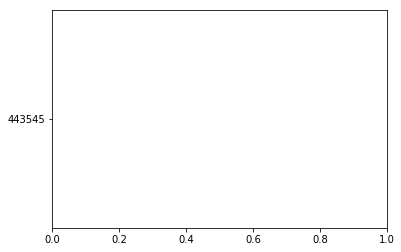

In [164]:
plt.scatter(X,Y)
plt.ylabel('Zestimate')
plt.xlabel('Bedrooms')
plt.show()